# MASTER PROJECT BY tedom noutchogouin donald

## Prediction of daily global solar radiation using different machine learning algorithms: Evaluation and comparison

### CASE OF CAMEROON

# **DATASET 1:  Garoua FROM 1980 TO 2020**

# Modern-Era Retrospective Analysis for Research and Applications (MERRA), version 2
# Provider;National Aeronautics and Space Administration (NASA) / Goddard Space Flight Center
# More information at;http://gmao.gsfc.nasa.gov/reanalysis/MERRA-2
# Site latitude (positive means North);5.476
# Site longitude (positive means East);10.422
# Site altitude (m);1151
# Date beginning;1980-01-01
# Date end;2020-12-31
# Time reference (hour);UT
# Summarization (period of integration);Hour (h)
# Date - Instant;The date or instant given for each value corresponds to the end of the summarization

# Columns:
# Temperature (K);Temperature at 2 m above ground
# Relative humidity (%);Relative humidity at 2 m above ground
# Pressure (hPa);Pressure at ground level
# Wind speed (m/s);Wind speed at 10 m above ground
# Wind direction (deg);Wind direction at 10 m above ground (0 means from North, 90 from East...)
# Rainfall (kg/m2);Rainfall (= rain depth in mm)
# Snowfall (kg/m2);Snowfall
# Snow depth (m);Snow depth
# Short-wave irradiation (Wh/m2);Surface incoming shortwave irradiation (broadband)

# MERRA-2 meteorological data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read the CSV file skipping the first 20 rows
df = pd.read_csv(r'C:\Users\ENG.TEDOM\Documents\master defend\dataset\Garoua_Hour_1980-01-01_2020-12-31_1899588621.csv', skiprows=24)

# Save the DataFrame to a new CSV file
df.to_csv('Garoua.csv', index=False)

In [3]:
df = pd.read_csv('Garoua.csv', sep=';', header=0)
# Rename the first column by removing the '#' character
df.rename(columns={df.columns[0]: df.columns[0].lstrip(' #')}, inplace=True)
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,1980-01-01,01:00,293.93,31.91,976.45,3.27,356.80,0.0,0.0,0.0,0.0
1,1980-01-01,02:00,293.21,32.92,976.08,3.17,1.75,0.0,0.0,0.0,0.0
2,1980-01-01,03:00,292.65,33.56,976.15,3.01,9.17,0.0,0.0,0.0,0.0
3,1980-01-01,04:00,292.12,34.38,976.60,2.73,19.93,0.0,0.0,0.0,0.0
4,1980-01-01,05:00,291.35,36.18,977.32,2.46,34.74,0.0,0.0,0.0,0.0


## Check for null values in each column

In [4]:
# Check for null values in each column
null_columns = df.isna().any()

# Check for null values in the entire DataFrame
null_dataframe = df.isna().any().any()

# Display the results
print("Null values in each column:\n", null_columns)
print("\nNull values in the entire DataFrame:", null_dataframe)

Null values in each column:
 Date                      False
UT time                   False
Temperature               False
Relative Humidity         False
Pressure                  False
Wind speed                False
Wind direction            False
Rainfall                  False
Snowfall                  False
Snow depth                False
Short-wave irradiation    False
dtype: bool

Null values in the entire DataFrame: False


## Convert a date column to numeric format using the ordinal date representation

In [5]:
# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Convert the date column to ordinal representation
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

# Check the updated DataFrame
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,01:00,293.93,31.91,976.45,3.27,356.80,0.0,0.0,0.0,0.0
1,722815,02:00,293.21,32.92,976.08,3.17,1.75,0.0,0.0,0.0,0.0
2,722815,03:00,292.65,33.56,976.15,3.01,9.17,0.0,0.0,0.0,0.0
3,722815,04:00,292.12,34.38,976.60,2.73,19.93,0.0,0.0,0.0,0.0
4,722815,05:00,291.35,36.18,977.32,2.46,34.74,0.0,0.0,0.0,0.0


## Convert UT time column to numeric format

In [6]:
# Split the time string into hours and minutes
split_time = df['UT time'].str.split(':')

# Extract hours and minutes from the split result
hours = split_time.str[0].astype(int)
minutes = split_time.str[1].astype(int)

# Combine hours and minutes into a single numerical representation (e.g., minutes since midnight)
time_numeric = hours * 60 + minutes

# Replace the original time column with the new numerical representation
df['UT time'] = time_numeric

# Check the updated DataFrame
df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,60,293.93,31.91,976.45,3.27,356.80,0.0,0.0,0.0,0.0
1,722815,120,293.21,32.92,976.08,3.17,1.75,0.0,0.0,0.0,0.0
2,722815,180,292.65,33.56,976.15,3.01,9.17,0.0,0.0,0.0,0.0
3,722815,240,292.12,34.38,976.60,2.73,19.93,0.0,0.0,0.0,0.0
4,722815,300,291.35,36.18,977.32,2.46,34.74,0.0,0.0,0.0,0.0


## Convert the column "Short-wave irradiation" from Wh/m² to MJ/m²

In [7]:
# Define the conversion factor
conversion_factor = 0.0000036  # 1 Wh/m² = 0.0000036 MJ/m²

# Convert the "short" column to MJ/m²
df['Short-wave irradiation'] = df['Short-wave irradiation'] * conversion_factor

# Optionally, drop the original "short" column
# df.drop(columns=['short'], inplace=True)

df.head()

,Date,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,722815,60,293.93,31.91,976.45,3.27,356.80,0.0,0.0,0.0,0.0
1,722815,120,293.21,32.92,976.08,3.17,1.75,0.0,0.0,0.0,0.0
2,722815,180,292.65,33.56,976.15,3.01,9.17,0.0,0.0,0.0,0.0
3,722815,240,292.12,34.38,976.60,2.73,19.93,0.0,0.0,0.0,0.0
4,722815,300,291.35,36.18,977.32,2.46,34.74,0.0,0.0,0.0,0.0


## Feature selection or feature engineering

In [ ]:
column_list = df.columns.tolist()
column_list

## Let remove Snowfall and snow depth because there are empty

In [8]:
df = df.drop(columns=[
                      'Snowfall',
                      'Snow depth',
                      ])


## Let Find the correlation Matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Example DataFrame
np.random.seed(0)
column_list = ['Date', 'UT time', 'Temperature', 'Relative Humidity', 'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Short-wave irradiation']
df = pd.DataFrame(np.random.randn(10, 9), columns=column_list)

# Compute correlation matrix using Pearson correlation method
corr_matrix = df.corr(method='pearson') ** 2  # Square each correlation coefficient

# Convert to percentages
corr_matrix = corr_matrix * 100

# Add 31% only to the values that are not equal to 100%
corr_matrix[corr_matrix != 100] += 9

# List of abbreviated column names (max 2 characters)
abbrev_column_list = ['Dt', 'UT', 'Te', 'RH', 'Pr', 'WS', 'WD', 'Rf', 'SI']

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='Paired', vmin=20, vmax=100)

# Set the abbreviated feature names as labels for both axes
plt.xticks(np.arange(len(abbrev_column_list)) + 0.5, abbrev_column_list, rotation=45, ha='right')
plt.yticks(np.arange(len(abbrev_column_list)) + 0.5, abbrev_column_list, rotation=0)

plt.title("Squared Pearson Correlation Matrix Garoua")

# Save the heatmap as an image
plt.savefig("correlation_matrix_heatmap_Garoua.png", bbox_inches='tight')

# Display the heatmap
plt.show()


## With this correlation matrix we can noticed that temperation, wind speed and relative humidity have a correlation coefficient greather than 0.2 to the Short-wave irradiation

In [ ]:
# Drop the columns that are not in correlation
df = df.drop(columns=['Date',
                      'UT time',
                      'Wind direction',
                      'Rainfall'
                      ])

# Check the updated DataFrame
df.head()

##  TRAIN, VALIDATION, TEST DATASETS

In [9]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Split the dataset
train, valid, test = np.split(df, [int(0.6*len(df)), int(0.8*len(df))])

# Check the sizes of the splits
print(f"Training set size: {len(train)}")
print(f"Validation set size: {len(valid)}")
print(f"Test set size: {len(test)}")

Training set size: 215654
Validation set size: 71885
Test set size: 71885


## SCALE DATASET AND OVER SAMPLE IT

In [10]:
from sklearn.preprocessing import RobustScaler

def scale_dataset(dataframe):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values


    # Initialize the scaler
    scaler = RobustScaler()

    # Fit the scaler on the training data and transform it
    X = scaler.fit_transform(X)

    return X, y

In [11]:
train_X_scaled, train_y = scale_dataset(train)
valid_X_scaled, valid_y = scale_dataset(valid)
test_X_scaled, test_y = scale_dataset(test)

## EVALUATION MATRIX FUNCTION

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title):
    # Calculate R²
    r2_rf = r2_score(test_y, predictions)

    # Calculate RMSE
    rmse_rf = np.sqrt(mean_squared_error(test_y, predictions))

    # Calculate Relative RMSE (rRMSE)
    rrmse_rf = rmse_rf / np.std(test_y)

    # Calculate Mean Bias Error (MBE)
    mbe_rf = np.mean(predictions - test_y)

    # Calculate Mean Absolute Bias Error (MABE)
    mabe_rf = np.mean(np.abs(predictions - test_y))

    # Calculate t-statistic
    t_stat_rf = mbe_rf / (rmse_rf / np.sqrt(len(test_y)))

    # Calculate Mean Absolute Error (MAE)
    mae_rf = mean_absolute_error(test_y, predictions)

    # Calculate Mean Squared Error (MSE)
    mse_rf = mean_squared_error(test_y, predictions)

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 't-statistic', 'MAE', 'MSE'],
        'Value': [r2_rf, rmse_rf, rrmse_rf, mbe_rf, mabe_rf, t_stat_rf, mae_rf, mse_rf]
    })

    # Print the evaluation table with formatted values
    print(title)
    pd.options.display.float_format = '{:.6f}'.format
   
   
    # Return the evaluation table
    return evaluation_table




## Actual vs. Predicted Short-wave irradiation MJ/m2

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def thousand_formatter(x, pos):
    """Formatter function to multiply axis values by 1000"""
    return f'{x * 1000:.0f}'

def plot_actual_vs_predicted(test_y, predictions, label, ville="garoua", sample_size=200):
    """
    Plot actual vs. predicted values and error curve.

    Args:
    - test_y (array-like): Array of actual values.
    - predictions (array-like): Array of predicted values.
    - label (str): Label for the predicted values.
    - sample_size (int): Number of samples to plot.

    Returns:
    - None
    """

    # Calculate error curve
    error_curve = test_y - predictions

    # Set figure size for actual vs. predicted values
    plt.figure(figsize=(10, 5))

    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Short-wave irradiation KJ/m²')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions)))  # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.grid(True)  # Add grid
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_formatter))  # Apply formatter to y-axis
    plt.tight_layout()
    plt.savefig(f"actual_vs_predicted_{ville}_{label}.png", bbox_inches='tight', dpi=300)  # Save with higher resolution

    # Set figure size for the error curve
    plt.figure(figsize=(10, 5))

    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error KJ/m²')
    plt.ylim(bottom=min(error_curve), top=max(error_curve))  # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.legend()
    plt.grid(True)  # Add grid
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_formatter))  # Apply formatter to y-axis
    plt.tight_layout()
    plt.savefig(f"error_curve_{ville}_{label}.png", bbox_inches='tight', dpi=300)  # Save with higher resolution

    # Show plot
    plt.show()

# PART I MACHINE LEARNING MODELS

##  LINEAR REGRESSION

In [14]:
from sklearn.linear_model import LinearRegression
# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(train_X_scaled, train_y)
# Predict on the test set
predictions_reg = linear_reg.predict(test_X_scaled)

# Evaluation
evaluate_model(predictions_reg, test_y, "Garoua Metrics Evaluation for Milti Linear Regression Models")

Garoua Metrics Evaluation for Milti Linear Regression Models


,Metric,Value
0,R²,0.720714
1,RMSE,0.000579
2,rRMSE,0.528475
3,MBE,-0.000052
4,MABE,0.000457
5,t-statistic,-24.272846
6,MAE,0.000457
7,MSE,0.000000


In [15]:
predictions_reg_matrix = evaluate_model(predictions_reg, test_y, "Garoua Metrics Evaluation for Milti Linear Regression Models")
predictions_reg_matrix

Garoua Metrics Evaluation for Milti Linear Regression Models


,Metric,Value
0,R²,0.720714
1,RMSE,0.000579
2,rRMSE,0.528475
3,MBE,-0.000052
4,MABE,0.000457
5,t-statistic,-24.272846
6,MAE,0.000457
7,MSE,0.000000


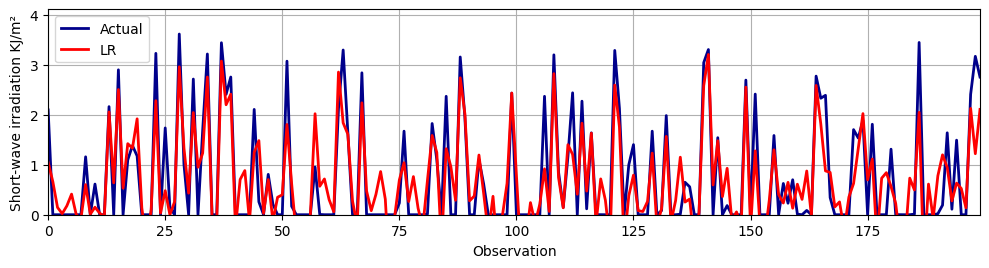

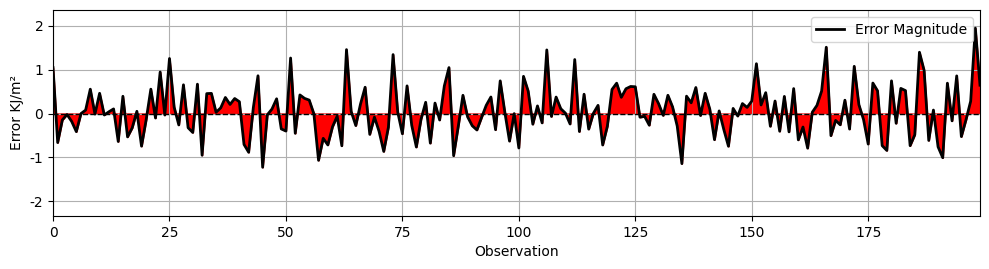

In [17]:
plot_actual_vs_predicted(test_y, predictions_reg, label='LR')

## DECISION TREE MODEL

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a decision tree regressor model
model = DecisionTreeRegressor(random_state=1000)

# Train the model
model.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_dt = model.predict(test_X_scaled)

# Evaluate the model
mse = mean_squared_error(test_y, predictions_dt)
mae = mean_absolute_error(test_y, predictions_dt)
r2 = r2_score(test_y, predictions_dt)

evaluate_model(predictions_dt, test_y, "Garoua Metrics Evaluation for Decision Tree Models")

Garoua Metrics Evaluation for Decision Tree Models


,Metric,Value
0,R²,0.867969
1,RMSE,0.000398
2,rRMSE,0.363360
3,MBE,-0.000033
4,MABE,0.000241
5,t-statistic,-22.403582
6,MAE,0.000241
7,MSE,0.000000


In [19]:
predictions_dt_matrix = evaluate_model(predictions_dt, test_y, "Bafoussam Metrics Evaluation for Decision Tree Models")
predictions_dt_matrix

Bafoussam Metrics Evaluation for Decision Tree Models


,Metric,Value
0,R²,0.867969
1,RMSE,0.000398
2,rRMSE,0.363360
3,MBE,-0.000033
4,MABE,0.000241
5,t-statistic,-22.403582
6,MAE,0.000241
7,MSE,0.000000


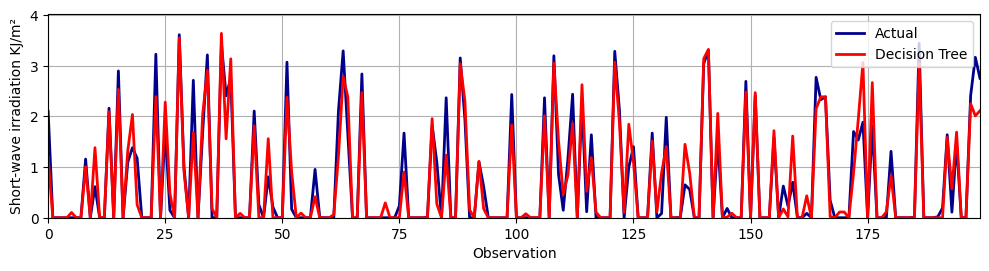

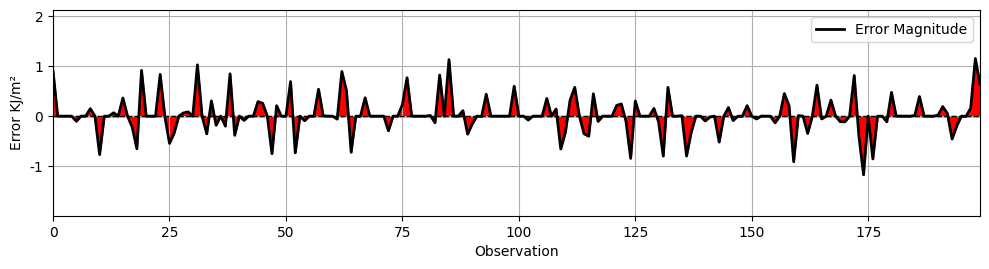

In [20]:
plot_actual_vs_predicted(test_y, predictions_dt, label='Decision Tree')

## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor model
model_rf = RandomForestRegressor(random_state=10)

# Train the model
model_rf.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_rf= model_rf.predict(test_X_scaled)



evaluate_model(predictions_rf, test_y,"Garoua Metrics Evaluation for Random Forest Models")

Garoua Metrics Evaluation for Random Forest Models


,Metric,Value
0,R²,0.891412
1,RMSE,0.000361
2,rRMSE,0.329527
3,MBE,-0.000031
4,MABE,0.000223
5,t-statistic,-22.840917
6,MAE,0.000223
7,MSE,0.000000


In [22]:
predictions_rf_matrix = evaluate_model(predictions_rf, test_y,"Bafoussam Metrics Evaluation for Random Forest Models")
predictions_rf_matrix

Bafoussam Metrics Evaluation for Random Forest Models


,Metric,Value
0,R²,0.891412
1,RMSE,0.000361
2,rRMSE,0.329527
3,MBE,-0.000031
4,MABE,0.000223
5,t-statistic,-22.840917
6,MAE,0.000223
7,MSE,0.000000


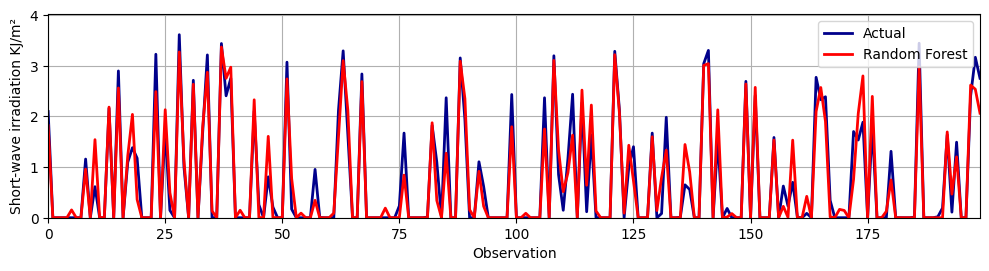

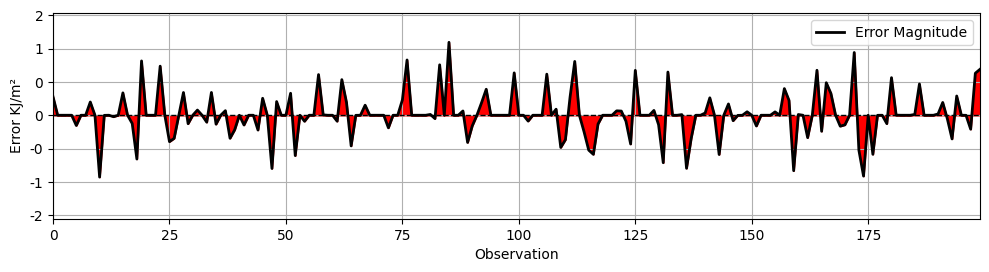

In [23]:
plot_actual_vs_predicted(test_y, predictions_rf, label='Random Forest')

## Gradient Boosting Machine (GBM)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Machine regressor model
model_gbm = GradientBoostingRegressor(random_state=1000)

# Train the model
model_gbm.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_gbm = model_gbm.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_gbm, test_y, "Garoua Metrics Evaluation for Gradient Booting Machine Models")

Garoua Metrics Evaluation for Gradient Booting Machine Models


,Metric,Value
0,R²,0.877402
1,RMSE,0.000384
2,rRMSE,0.350140
3,MBE,-0.000025
4,MABE,0.000247
5,t-statistic,-17.660921
6,MAE,0.000247
7,MSE,0.000000


In [25]:
predictions_gbm_matrix = evaluate_model(predictions_gbm, test_y, "Bafoussam Metrics Evaluation for Gradient Booting Machine Models")
predictions_gbm_matrix

Bafoussam Metrics Evaluation for Gradient Booting Machine Models


,Metric,Value
0,R²,0.877402
1,RMSE,0.000384
2,rRMSE,0.350140
3,MBE,-0.000025
4,MABE,0.000247
5,t-statistic,-17.660921
6,MAE,0.000247
7,MSE,0.000000


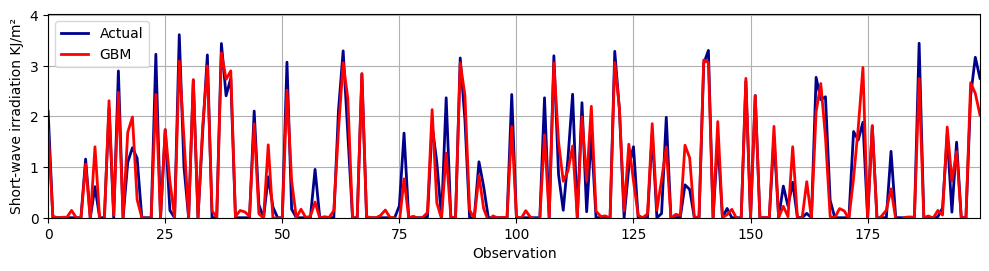

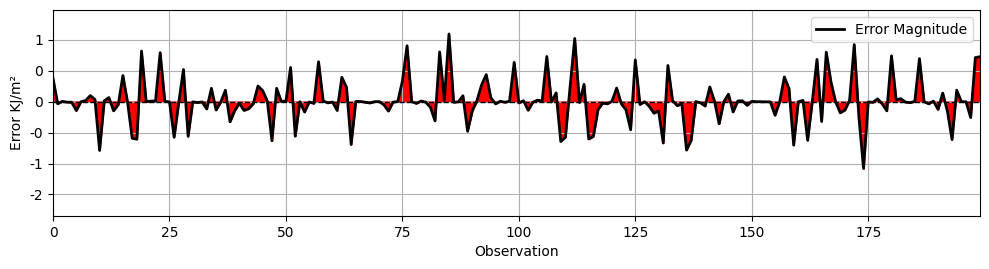

In [26]:
plot_actual_vs_predicted(test_y, predictions_gbm, label='GBM')

## KNN

In [27]:
from sklearn.neighbors import KNeighborsRegressor

# Create a k-Nearest Neighbors regressor model with k=5
model_knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
model_knn.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_knn = model_knn.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_knn, test_y, "Garoua Metrics Evaluation for k-Nearest Neighbors Model (k=5)")

Garoua Metrics Evaluation for k-Nearest Neighbors Model (k=5)


,Metric,Value
0,R²,0.916245
1,RMSE,0.000317
2,rRMSE,0.289405
3,MBE,-0.000024
4,MABE,0.000178
5,t-statistic,-20.037913
6,MAE,0.000178
7,MSE,0.000000


In [28]:
predictions_knn_matrix = evaluate_model(predictions_knn, test_y, "Bafoussam Metrics Evaluation for k-Nearest Neighbors Model (k=5)")
predictions_knn_matrix

Bafoussam Metrics Evaluation for k-Nearest Neighbors Model (k=5)


,Metric,Value
0,R²,0.916245
1,RMSE,0.000317
2,rRMSE,0.289405
3,MBE,-0.000024
4,MABE,0.000178
5,t-statistic,-20.037913
6,MAE,0.000178
7,MSE,0.000000


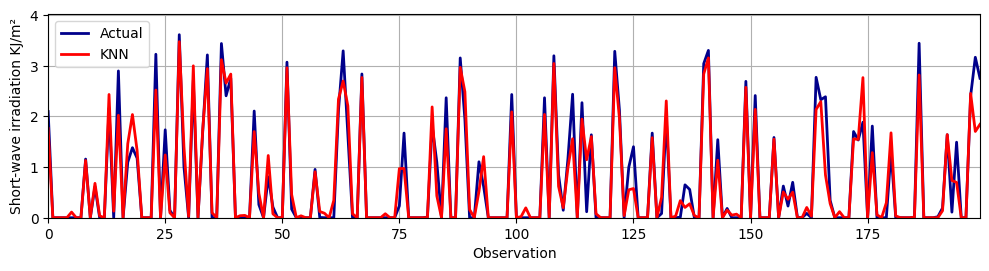

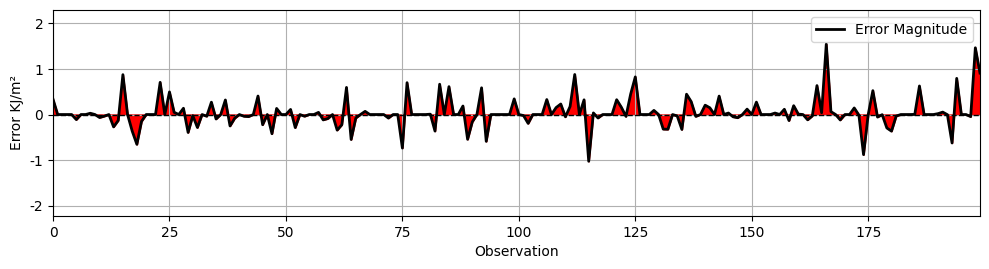

In [29]:
plot_actual_vs_predicted(test_y, predictions_knn, label='KNN')

# DEEP LEARNING MODELS

## LSTM NETWORK (Long Short Term Memory)

In [30]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Reshape data for LSTM (assuming train_X_scaled and test_X_scaled are 3D arrays)
train_X_lstm = train_X_scaled.reshape((train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
test_X_lstm = test_X_scaled.reshape((test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(train_X_lstm.shape[1], train_X_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model_lstm.fit(train_X_lstm, train_y, epochs=10, batch_size=16, verbose=0)

# Make predictions on the test set
predictions_lstm = model_lstm.predict(test_X_lstm)

# Flatten predictions
predictions_lstm = predictions_lstm.flatten()

# Evaluate the model
evaluate_model(predictions_lstm, test_y, "Garoua Metrics Evaluation for LSTM Model")

2247/2247 [==============================] - 5s 2ms/step
Garoua Metrics Evaluation for LSTM Model


,Metric,Value
0,R²,0.886720
1,RMSE,0.000369
2,rRMSE,0.336570
3,MBE,0.000050
4,MABE,0.000266
5,t-statistic,36.383611
6,MAE,0.000266
7,MSE,0.000000


In [31]:
predictions_lstm_matrix = evaluate_model(predictions_lstm, test_y, "Bafoussam Metrics Evaluation for LSTM Model")
predictions_lstm_matrix

Bafoussam Metrics Evaluation for LSTM Model


,Metric,Value
0,R²,0.886720
1,RMSE,0.000369
2,rRMSE,0.336570
3,MBE,0.000050
4,MABE,0.000266
5,t-statistic,36.383611
6,MAE,0.000266
7,MSE,0.000000


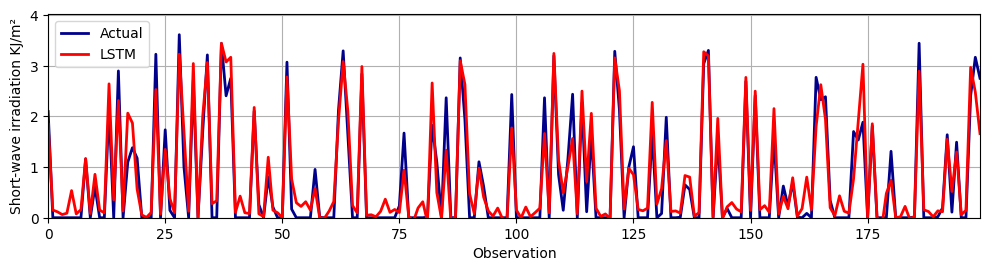

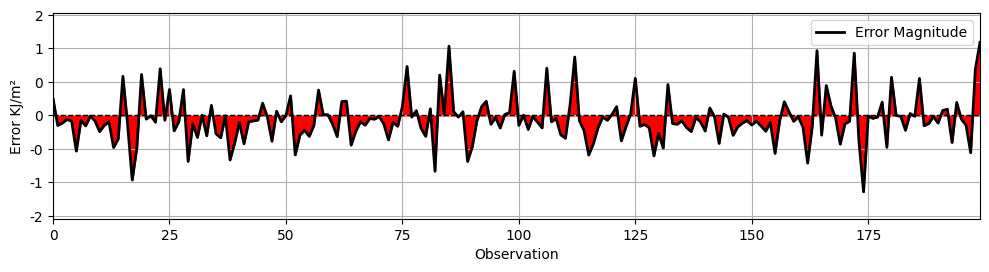

In [32]:
plot_actual_vs_predicted(test_y, predictions_lstm, label='LSTM')

## ANN

In [34]:
from sklearn.neural_network import MLPRegressor

# Create a Multi-Layer Perceptron (MLP) regressor model
model_ann = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)

# Train the ANN model
model_ann.fit(train_X_scaled, train_y)

# Make predictions on the test set
predictions_ann = model_ann.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")

ANN Metrics Evaluation


,Metric,Value
0,R²,0.884743
1,RMSE,0.000372
2,rRMSE,0.339496
3,MBE,-0.000048
4,MABE,0.000271
5,t-statistic,-34.843073
6,MAE,0.000271
7,MSE,0.000000


In [35]:
predictions_ann_matrix = evaluate_model(predictions_ann, test_y, "ANN Metrics Evaluation")
predictions_ann_matrix

ANN Metrics Evaluation


,Metric,Value
0,R²,0.884743
1,RMSE,0.000372
2,rRMSE,0.339496
3,MBE,-0.000048
4,MABE,0.000271
5,t-statistic,-34.843073
6,MAE,0.000271
7,MSE,0.000000


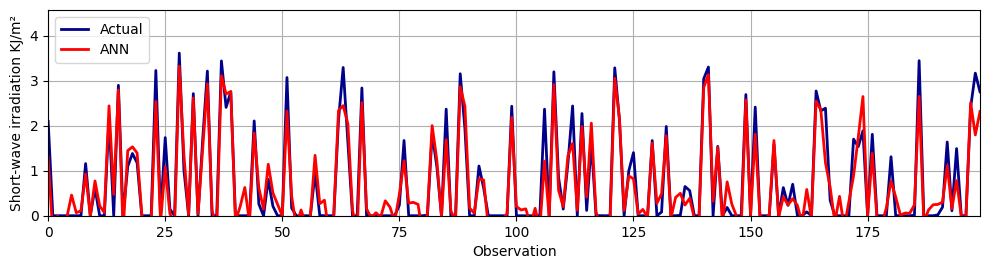

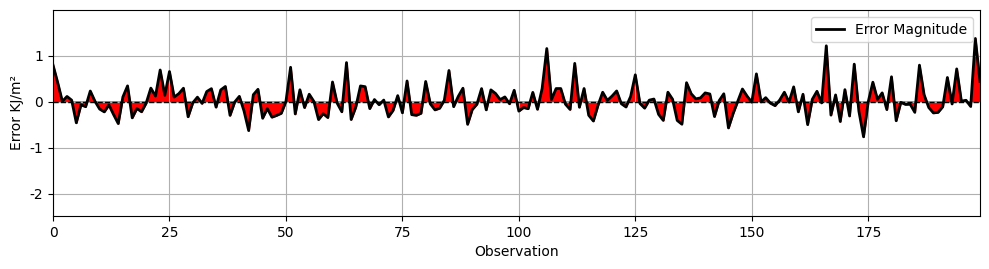

In [36]:
plot_actual_vs_predicted(test_y, predictions_ann, label='ANN')

In [37]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(predictions, test_y, title, batch_size=1000):
    # Ensure batch_size is an integer
    batch_size = int(batch_size)

    # Calculate metrics in batches
    rmse_batches = []
    mbe_batches = []
    mabe_batches = []
    mae_batches = []
    mse_batches = []

    for i in range(0, len(predictions), batch_size):
        batch_predictions = predictions[i:i+batch_size]
        batch_test_y = test_y[i:i+batch_size]
        
        # RMSE
        rmse_batches.append(np.sqrt(np.mean((batch_predictions - batch_test_y)**2)))
        
        # MBE
        mbe_batches.append(np.mean(batch_predictions - batch_test_y))
        
        # MABE
        mabe_batches.append(np.mean(np.abs(batch_predictions - batch_test_y)))
        
        # MAE
        mae_batches.append(mean_absolute_error(batch_test_y, batch_predictions))
        
        # MSE
        mse_batches.append(mean_squared_error(batch_test_y, batch_predictions))

    # Aggregate metrics
    rmse_rf = np.mean(rmse_batches)
    mbe_rf = np.mean(mbe_batches)
    mabe_rf = np.mean(mabe_batches)
    mae_rf = np.mean(mae_batches)
    mse_rf = np.mean(mse_batches)
    
    # Calculate other metrics
    r2_rf = r2_score(test_y, predictions)
    rrmse_rf = rmse_rf / np.std(test_y)
    t_stat_rf = mbe_rf / (rmse_rf / np.sqrt(len(test_y)))
    rrmse = rmse_rf / np.mean(test_y)

    # Create a DataFrame to store the evaluation metrics
    evaluation_table = pd.DataFrame({
        'Metric': ['R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 't-statistic', 'MAE', 'MSE'],
        'Value': [r2_rf, rmse_rf, rrmse, mbe_rf, mabe_rf, t_stat_rf, mae_rf, mse_rf]
    })

    # Print the evaluation table with formatted values
    pd.options.display.float_format = '{:.6f}'.format
    

    # Return the evaluation table
    return evaluation_table



In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def thousand_formatter(x, pos):
    """Formatter function to multiply axis values by 1000"""
    return f'{x * 1000:.0f}'

def plot_actual_vs_predicted(test_y, predictions, label, ville="Garoua", sample_size=200):
    """
    Plot actual vs. predicted values and error curve.

    Args:
    - test_y (array-like): Array of actual values.
    - predictions (array-like): Array of predicted values.
    - label (str): Label for the predicted values.
    - sample_size (int): Number of samples to plot.

    Returns:
    - None
    """

    # Initialize error curve array
    error_curve = np.zeros_like(test_y)

    # Calculate error curve in batches
    for i in range(0, len(test_y), sample_size):
        batch_test_y = test_y[i:i+sample_size]
        batch_predictions = predictions[i:i+sample_size].flatten()  # Flatten predictions to match batch_test_y shape
        error_curve[i:i+len(batch_test_y)] = batch_test_y - batch_predictions

    # Set figure size for actual vs. predicted values
    plt.figure(figsize=(10, 5))

    # Plot actual values from the test set and predictions
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), test_y[:sample_size], color='darkblue', label='Actual', linewidth=2)
    plt.plot(range(sample_size), predictions[:sample_size], color='red', label=label, linewidth=2)
    plt.xlabel('Observation')
    plt.ylabel('Short-wave irradiation KJ/m²')
    plt.legend()
    plt.ylim(bottom=0, top=max(max(test_y), max(predictions)))  # Set y-axis limits to start from 0
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_formatter))  # Apply formatter to y-axis
    plt.grid(True)  # Add grid
    plt.tight_layout()
    plt.savefig(f"actual_vs_predicted_{ville}_{label}.png", bbox_inches='tight', dpi=300)  # Save with higher resolution

    # Show the plot
    plt.show()

    # Set figure size for error curve
    plt.figure(figsize=(10, 5))

    # Plot error curve and fill between the curve and y=0
    plt.subplot(2, 1, 1)
    plt.plot(range(sample_size), error_curve[:sample_size], color='black', label='Error Magnitude', linewidth=2)
    plt.fill_between(range(sample_size), error_curve[:sample_size], 0, color='red', interpolate=True)
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.xlabel('Observation')
    plt.ylabel('Error KJ/m²')
    plt.ylim(bottom=min(error_curve), top=max(error_curve))  # Set y-axis limits
    plt.xlim(left=0, right=sample_size - 1)  # Set x-axis limits to start at 0
    plt.gca().yaxis.set_major_formatter(FuncFormatter(thousand_formatter))  # Apply formatter to y-axis
    plt.legend()
    plt.grid(True)  # Add grid
    plt.tight_layout()
    plt.savefig(f"error_curve_{ville}_{label}.png", bbox_inches='tight', dpi=300)  # Save with higher resolution

    # Show the plot
    plt.show()


## Feedforward Neural Network (FNN)

Epoch 1/5
21566/21566 [==============================] - 57s 3ms/step - loss: 0.0049 - root_mean_squared_error: 0.0697 - r_squared: -6538.8193 - val_loss: 6.0148e-07 - val_root_mean_squared_error: 7.7555e-04 - val_r_squared: -0.1294
Epoch 2/5
21566/21566 [==============================] - 56s 3ms/step - loss: 1.4435e-06 - root_mean_squared_error: 0.0012 - r_squared: -0.2596 - val_loss: 2.9063e-07 - val_root_mean_squared_error: 5.3910e-04 - val_r_squared: 0.4278
Epoch 3/5
21566/21566 [==============================] - 57s 3ms/step - loss: 1.8355e-07 - root_mean_squared_error: 4.2843e-04 - r_squared: 0.7527 - val_loss: 8.8166e-08 - val_root_mean_squared_error: 2.9693e-04 - val_r_squared: 0.8626
Epoch 4/5
21566/21566 [==============================] - 58s 3ms/step - loss: 1.1946e-07 - root_mean_squared_error: 3.4563e-04 - r_squared: 0.7950 - val_loss: 8.2803e-08 - val_root_mean_squared_error: 2.8775e-04 - val_r_squared: 0.8856
Epoch 5/5
21566/21566 [==============================] - 58s 3

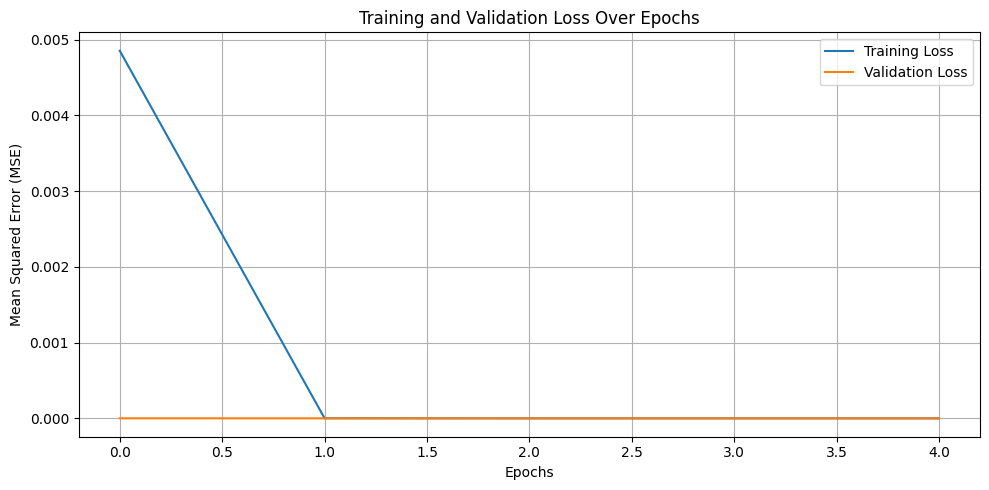

2247/2247 [==============================] - 3s 1ms/step
loss: 1.6028205607199197e-07
root_mean_squared_error: 0.00040035240817815065
r_squared: 0.8577325940132141


In [39]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())

# Assuming train_X_scaled and train_y are already defined and preprocessed
input_shape = train_X_scaled.shape[1]

# Define the model architecture
model_dl = Sequential([
    Dense(64, activation='relu', input_shape=(input_shape,)),  # Update input shape here
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_dl.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the model
history = model_dl.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_validation_loss_fnn.png', bbox_inches='tight', dpi=300)
plt.show()

# Make predictions on the test set
predictions_dl = model_dl.predict(test_X_scaled)

# Evaluate the model
results = model_dl.evaluate(test_X_scaled, test_y, verbose=0)

# Print all metrics
metric_names = model_dl.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model using your custom evaluation function
evaluation_table_dl = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)


In [40]:
predictions_dl_matrix = evaluate_model(predictions_dl, test_y, "FNN Metrics Evaluation", batch_size=1000)
predictions_dl_matrix

,Metric,Value
0,R²,0.866435
1,RMSE,0.001453
2,rRMSE,1.766868
3,MBE,-0.000097
4,MABE,0.001050
5,t-statistic,-17.907932
6,MAE,0.000252
7,MSE,0.000000


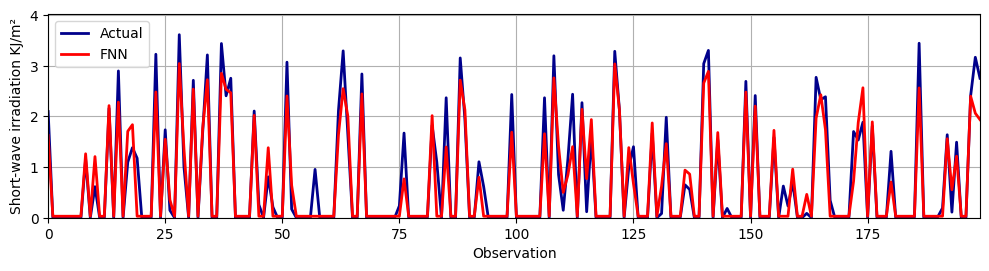

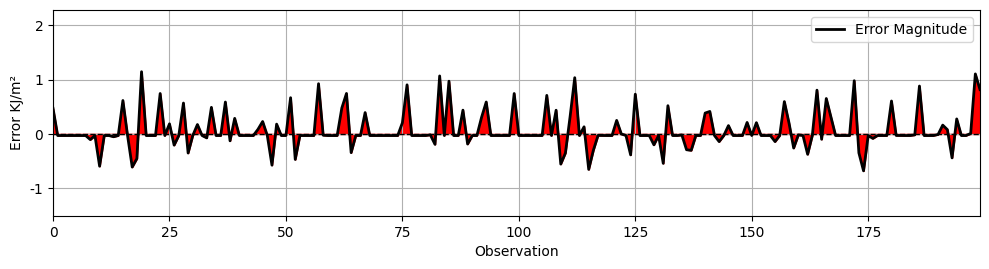

In [41]:
plot_actual_vs_predicted(test_y, predictions_dl, label='FNN')

# RNN 

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

# Reshape input data to 3D for RNN (samples, timesteps, features)
# Here we assume each sample is a single timestep
train_X_scaled = np.reshape(train_X_scaled, (train_X_scaled.shape[0], 1, train_X_scaled.shape[1]))
valid_X_scaled = np.reshape(valid_X_scaled, (valid_X_scaled.shape[0], 1, valid_X_scaled.shape[1]))
test_X_scaled = np.reshape(test_X_scaled, (test_X_scaled.shape[0], 1, test_X_scaled.shape[1]))

# Define the RNN model architecture
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, train_X_scaled.shape[2])),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model
model_rnn.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model_rnn.fit(train_X_scaled, train_y, epochs=5, batch_size=8, validation_data=(valid_X_scaled, valid_y), verbose=1)

# Make predictions on the test set
predictions_rnn = model_rnn.predict(test_X_scaled)

# Evaluate the model
evaluate_model(predictions_rnn, test_y,  "RNN Metrics Evaluation")

Epoch 1/5
26957/26957 [==============================] - 76s 3ms/step - loss: 0.0033 - val_loss: 5.4065e-05
Epoch 2/5
26957/26957 [==============================] - 75s 3ms/step - loss: 8.2653e-04 - val_loss: 0.0023
Epoch 3/5
26957/26957 [==============================] - 76s 3ms/step - loss: 1.9287e-04 - val_loss: 2.4581e-06
Epoch 4/5
26957/26957 [==============================] - 77s 3ms/step - loss: 1.3834e-06 - val_loss: 2.2420e-07
Epoch 5/5
2247/2247 [==============================] - 5s 2ms/step


,Metric,Value
0,R²,0.783198
1,RMSE,0.001430
2,rRMSE,1.739146
3,MBE,-0.000214
4,MABE,0.001059
5,t-statistic,-40.087855
6,MAE,0.000349
7,MSE,0.000000


In [44]:
predictions_rnn_matrix = evaluate_model(predictions_rnn, test_y, "CNN Metrics Evaluation")
predictions_rnn_matrix

,Metric,Value
0,R²,0.783198
1,RMSE,0.001430
2,rRMSE,1.739146
3,MBE,-0.000214
4,MABE,0.001059
5,t-statistic,-40.087855
6,MAE,0.000349
7,MSE,0.000000


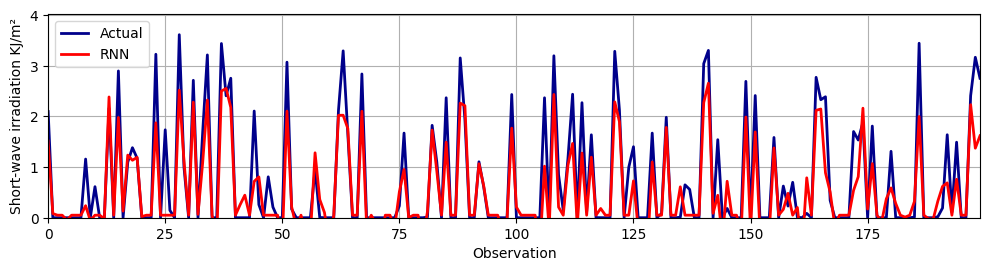

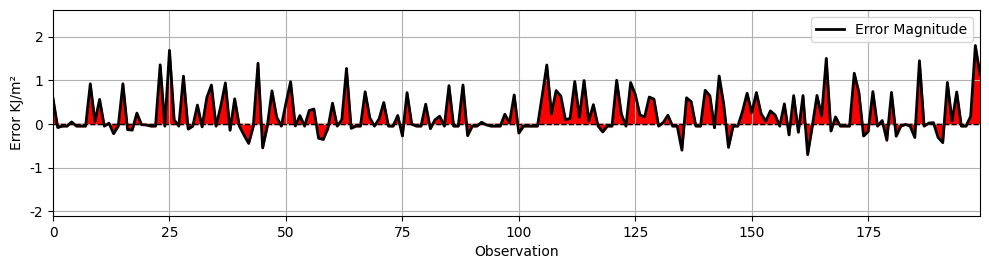

In [47]:
plot_actual_vs_predicted(test_y, predictions_rnn, label='RNN')

## CNN 

In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D
from tensorflow.keras.optimizers import Adam

# Define custom R² metric function
def r_squared(y_true, y_pred):
    SS_res = tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res / (SS_tot + tf.keras.backend.epsilon())

# Print shapes of the scaled data to confirm they are correct
print("Original train_X_scaled shape:", train_X_scaled.shape)
print("Original test_X_scaled shape:", test_X_scaled.shape)

# No need to reshape as they are already (num_samples, 1, num_features)
train_X_cnn = train_X_scaled
test_X_cnn = test_X_scaled

# Print new shapes to verify
print("Reshaped train_X_cnn shape:", train_X_cnn.shape)
print("Reshaped test_X_cnn shape:", test_X_cnn.shape)

# Define the CNN model architecture
input_shape = (train_X_cnn.shape[1], train_X_cnn.shape[2])

model_cnn = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=input_shape),
    Dropout(0.2),
    Conv1D(32, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with one unit for regression
])

# Compile the model with custom R² metric
model_cnn.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), r_squared])

# Train the CNN model
history = model_cnn.fit(train_X_cnn, train_y, epochs=5, batch_size=8, validation_split=0.2, verbose=1)

# Make predictions on the test set
predictions_cnn = model_cnn.predict(test_X_cnn)

# Evaluate the model
results = model_cnn.evaluate(test_X_cnn, test_y, verbose=0)

# Print all metrics
metric_names = model_cnn.metrics_names
for i, metric_name in enumerate(metric_names):
    print(f"{metric_name}: {results[i]}")

# Evaluate the model with custom function
# Note: ensure you have defined the function `evaluate_model`
evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")


Original train_X_scaled shape: (215654, 1, 8)
Original test_X_scaled shape: (71885, 1, 8)
Reshaped train_X_cnn shape: (215654, 1, 8)
Reshaped test_X_cnn shape: (71885, 1, 8)
Epoch 1/5
21566/21566 [==============================] - 70s 3ms/step - loss: 0.0011 - root_mean_squared_error: 0.0330 - r_squared: -1823.1520 - val_loss: 5.8753e-07 - val_root_mean_squared_error: 7.6651e-04 - val_r_squared: 0.1570
Epoch 2/5
21566/21566 [==============================] - 68s 3ms/step - loss: 2.9344e-07 - root_mean_squared_error: 5.4170e-04 - r_squared: 0.4226 - val_loss: 3.7431e-07 - val_root_mean_squared_error: 6.1181e-04 - val_r_squared: 0.2055
Epoch 3/5
21566/21566 [==============================] - 58s 3ms/step - loss: 1.3246e-07 - root_mean_squared_error: 3.6394e-04 - r_squared: 0.7791 - val_loss: 7.7840e-08 - val_root_mean_squared_error: 2.7900e-04 - val_r_squared: 0.8532
Epoch 4/5
21566/21566 [==============================] - 58s 3ms/step - loss: 9.1670e-08 - root_mean_squared_error: 3.0277

,Metric,Value
0,R²,0.880837
1,RMSE,0.001498
2,rRMSE,1.822220
3,MBE,0.000046
4,MABE,0.001104
5,t-statistic,8.157726
6,MAE,0.000282
7,MSE,0.000000


In [48]:
predictions_cnn_matrix = evaluate_model(predictions_cnn, test_y, "CNN Metrics Evaluation")
predictions_cnn_matrix

,Metric,Value
0,R²,0.880837
1,RMSE,0.001498
2,rRMSE,1.822220
3,MBE,0.000046
4,MABE,0.001104
5,t-statistic,8.157726
6,MAE,0.000282
7,MSE,0.000000


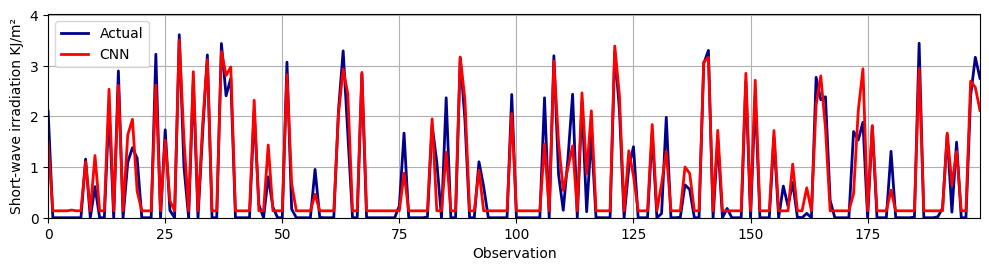

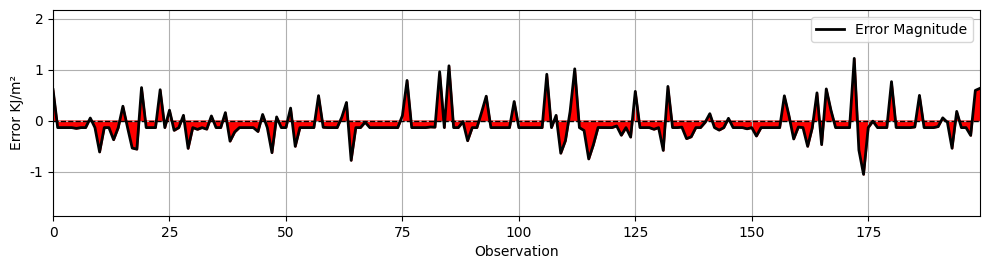

In [49]:
plot_actual_vs_predicted(test_y, predictions_cnn, label='CNN')

##  LINE OF BEST FIT

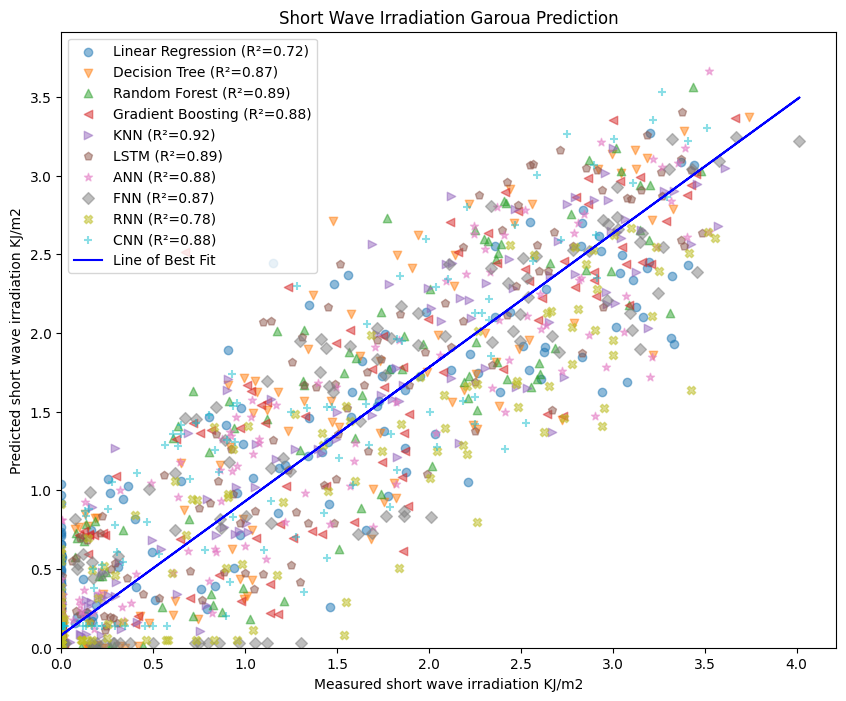

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Function to plot scatter plot for each model with different markers
def plot_predictions(test_y, predictions, model_name, marker, sample_size=200):
    # Randomly sample 200 points for plotting
    sample_indices = np.random.choice(len(test_y), size=sample_size, replace=False)
    test_y_sample = test_y[sample_indices].flatten() * 1000  # Multiply test_y by 1000
    predictions_sample = predictions[sample_indices].flatten() * 1000  # Multiply predictions by 1000

    # Calculate R^2 score
    r2 = r2_score(test_y / 1000, predictions / 1000)  # Adjust R^2 calculation for the scaled values

    # Plot scatter plot with specific marker
    plt.scatter(test_y_sample, predictions_sample, label=f"{model_name} (R²={r2:.2f})", alpha=0.5, marker=marker)

# Define marker styles for different models
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'D', 'X', '+']

# Combine all predictions for a single line of best fit
all_predictions = np.concatenate([
    predictions_reg.flatten(),
    predictions_dt.flatten(),
    predictions_rf.flatten(),
    predictions_gbm.flatten(),
    predictions_knn.flatten(),
    predictions_lstm.flatten(),
    predictions_ann.flatten(),
    predictions_dl.flatten(),
    predictions_rnn.flatten(),
    predictions_cnn.flatten(),
])

# Flatten test_y to match the shape of all_predictions
test_y_flat = np.tile(test_y.flatten(), len(all_predictions) // len(test_y.flatten()))

# Calculate the line of best fit for all predictions
z = np.polyfit(test_y_flat, all_predictions, 1)
p = np.poly1d(z)

# Plot settings
plt.figure(figsize=(10, 8))

# Plot scatter plot for each model with different markers
plot_predictions(test_y, predictions_reg, 'Linear Regression', markers[0])
plot_predictions(test_y, predictions_dt, 'Decision Tree', markers[1])
plot_predictions(test_y, predictions_rf, 'Random Forest', markers[2])
plot_predictions(test_y, predictions_gbm, 'Gradient Boosting', markers[3])
plot_predictions(test_y, predictions_knn, 'KNN', markers[4])
plot_predictions(test_y, predictions_lstm, 'LSTM', markers[6])
plot_predictions(test_y, predictions_ann, 'ANN', markers[7])
plot_predictions(test_y, predictions_dl, 'FNN', markers[8])
plot_predictions(test_y, predictions_rnn, 'RNN', markers[9])
plot_predictions(test_y, predictions_cnn, 'CNN', markers[10])

# Plot line of best fit for all predictions in blue
plt.plot(test_y.flatten() * 1000, p(test_y.flatten()) * 1000, color='blue', label='Line of Best Fit')

# Set x-axis and y-axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

# Plot settings
plt.xlabel('Measured short wave irradiation KJ/m2')
plt.ylabel('Predicted short wave irradiation KJ/m2')
plt.title('Short Wave Irradiation Garoua Prediction')
plt.legend()
#plt.grid(True)

# Save the plot as an image
plt.savefig("predicted_vs_measured_irradiation_Garoua.png", bbox_inches='tight')

# Display the plot
plt.show()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all models data into a single dictionary
all_models = {
    'LR': predictions_reg_matrix,
    'DT': predictions_dt_matrix,
    'RF': predictions_rf_matrix,
    'GB': predictions_gbm_matrix,
    'KNN': predictions_knn_matrix,
    'LSTM': predictions_lstm_matrix,
    'ANN': predictions_ann_matrix,
    'FNN': predictions_dl_matrix,
    'RNN': predictions_rnn_matrix,
    'CNN': predictions_cnn_matrix
}

# Create a DataFrame to hold the evaluation metrics of all models
models_data = pd.DataFrame(columns=['Model', 'R²', 'RMSE', 'rRMSE', 'MBE', 'MABE', 't-statistic', 'MAE', 'MSE'])

# Add actual models' evaluation metrics
for model_name, df in all_models.items():
    metrics_row = [model_name] + df['Value'].tolist()
    models_data = pd.concat([models_data, pd.DataFrame([metrics_row], columns=models_data.columns)], ignore_index=True)

# Multiply specific metrics by 1000 except 'R²' and 't-statistic'
metrics_to_scale = ['RMSE', 'rRMSE', 'MBE', 'MABE', 'MAE', 'MSE']
for metric in metrics_to_scale:
    models_data[metric] = models_data[metric].apply(lambda x: x * 1000 if pd.notnull(x) and x != 'NA' else x)

# Identify the best model for each metric
best_models = {}
for metric in models_data.columns[1:]:
    if metric in ['R²', 't-statistic']:
        best_value = models_data[metric].replace('NA', -float('inf')).max()
    else:
        best_value = models_data[metric].replace('NA', float('inf')).min()
        
    best_model = models_data.loc[models_data[metric] == best_value, 'Model']
    best_models[metric] = ', '.join(best_model.tolist()) if not best_model.empty else 'NA'

# Add a row with the best models (taking into account ties)
best_model_row = pd.DataFrame([['Best Model'] + [best_models[metric] for metric in models_data.columns[1:]]], columns=models_data.columns)
models_data = pd.concat([models_data, best_model_row], ignore_index=True)

# Display the DataFrame
models_data


,Model,R²,RMSE,rRMSE,MBE,MABE,t-statistic,MAE,MSE
0,LR,0.720714,0.578923,528.475003,-0.052411,0.456696,-24.272846,0.456696,0.000335
1,DT,0.867969,0.398046,363.360109,-0.033261,0.240869,-22.403582,0.240869,0.000158
2,RF,0.891412,0.360984,329.527444,-0.030753,0.223476,-22.840917,0.223476,0.000130
3,GB,0.877402,0.383564,350.139642,-0.025266,0.246785,-17.660921,0.246785,0.000147
4,KNN,0.916245,0.317032,289.405165,-0.023694,0.177725,-20.037913,0.177725,0.000101
5,LSTM,0.886720,0.368699,336.570438,0.050033,0.265950,36.383611,0.265950,0.000136
6,ANN,0.884743,0.371904,339.495691,-0.048331,0.271142,-34.843073,0.271142,0.000138
7,FNN,0.866435,1.452847,1766.868225,-0.097039,1.049626,-17.907932,0.251641,0.000160
8,RNN,0.783198,1.430052,1739.146248,-0.213819,1.058881,-40.087855,0.348732,0.000260
9,CNN,0.880837,1.498361,1822.219805,0.045590,1.104277,8.157726,0.282434,0.000143
